In [ ]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

: 

In [2]:
assets = ['SQ','NVDA', 'NXST', 'GP']

In [3]:
# assign weights 
weights = np.array([0.2,0.2,0.2,0.2])

NameError: name 'np' is not defined

In [4]:
startDate = '2013-01-01'
today = datetime.today().strftime('%Y-%m-%d')
today

NameError: name 'datetime' is not defined

In [46]:
df = pd.DataFrame()
for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start = startDate, end =today)['Adj Close']

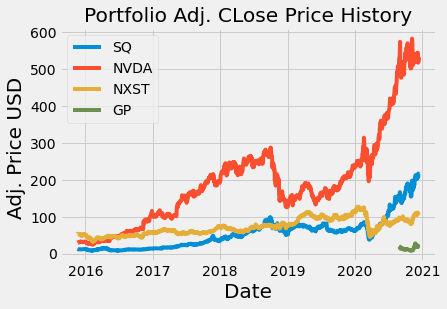

In [47]:
title = 'Portfolio Adj. CLose Price History'
my_stocks =df   # get the stocks

for i in my_stocks.columns.values:
    plt.plot(my_stocks[i], label=i)
    
plt.title(title)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Adj. Price USD ', fontsize = 20)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()


In [49]:
returns = df.pct_change() # show the daily simple return
returns

,SQ,NVDA,NXST,GP
Date,,,,
2015-11-19,NaN,NaN,NaN,NaN
2015-11-20,-0.016832,0.008676,0.011407,NaN
2015-11-23,-0.056809,-0.014973,-0.015094,NaN
2015-11-24,-0.008251,0.008085,-0.007915,NaN
2015-11-25,-0.009983,-0.001283,-0.002377,NaN
...,...,...,...,...
2020-12-08,0.002023,-0.018869,-0.015713,0.199673
2020-12-09,-0.028027,-0.031405,-0.014140,-0.112779
2020-12-10,0.049314,0.003209,-0.000185,-0.019477


In [50]:
# The annualized covariance matrix.
cov_mat_a = returns.cov() *252
cov_mat_a

,SQ,NVDA,NXST,GP
SQ,0.289963,0.128027,0.085021,0.224847
NVDA,0.128027,0.223727,0.074709,0.178081
NXST,0.085021,0.074709,0.202693,0.188466
GP,0.224847,0.178081,0.188466,2.122976


In [52]:
# calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_mat_a, weights))
port_variance

0.18390640942047515

In [54]:
port_volatility = np.sqrt(port_variance)
port_volatility

0.42884310583297847

In [56]:
port_Simple_AnnualReturn = np.sum(returns. mean() * weights) * 252
port_Simple_AnnualReturn

0.38892099941343466

In [62]:
# show the expected annual return, volatility(Risk), and variance
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vol = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(port_Simple_AnnualReturn, 2) * 100) + '%'

print('expected annual return: ', percent_ret)
print('Annual Volatility / risk : ', percent_vol)
print('Annual Variance : ', percent_var)

expected annual return:  39.0%
Annual Volatility / risk :  43.0%
Annual Variance :  18.0%


In [63]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [78]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# optimize for max sharpe ratio 
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() 
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('SQ', 0.35183), ('NVDA', 0.64817), ('NXST', 0.0), ('GP', 0.0)])
Expected annual return: 75.3%
Annual volatility: 43.4%
Sharpe Ratio: 1.69


(0.7534253799960282, 0.43391006174703367, 1.690270506848974)

In [79]:
0.35183 + 0.64817 

1.0

In [81]:
#get the discrete allocation of each sharp per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation, leftover = da.lp_portfolio()
print('Discrete Allocation:' , allocation)
print('Funds remaining :${:.2f}'.format(leftover))

Discrete Allocation: {'SQ': 25, 'NVDA': 18}
Funds remaining :$21.20
